In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import keras
from keras.layers import Conv2D , Dense ,Activation , MaxPool2D , Input
from keras.models import Model
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
ds = pd.read_csv('C:/Users/vikas/Desktop/mljan19dwk/Datasets/mnist/train.csv').values

In [24]:
X_train , X_test , Y_train , Y_test = train_test_split(ds[: , 1:] , ds[: , 0] , test_size=0.25)
print(X_train.shape , X_test.shape , Y_train.shape , Y_test.shape)

(31500, 784) (10500, 784) (31500,) (10500,)


In [25]:
X_train  , X_test = X_train/255 , X_test/255
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print(X_train.shape , X_test.shape , Y_train.shape , Y_test.shape)

(31500, 784) (10500, 784) (31500, 10) (10500, 10)


## Auto_Encoder

In [37]:
inp = Input((784 , ))
em = Dense(64 , activation='relu')(inp)
out = Dense(784,activation='relu')(em)

auto_encode = Model(inputs = inp , outputs = out)
auto_encode.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_8 (Dense)              (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [38]:
auto_encode.compile(loss='mse' , optimizer = 'adagrad' , metrics=['accuracy'])

In [39]:
hist = auto_encode.fit(X_train,X_train,
         shuffle=True
         ,epochs=40,
         batch_size=512,
         validation_data=(X_test,X_test))

Train on 31500 samples, validate on 10500 samples
Epoch 1/40
31500/31500 [==============================] - 1s 40us/step - loss: 0.0559 - acc: 0.0119 - val_loss: 0.0418 - val_acc: 0.0124
Epoch 2/40
31500/31500 [==============================] - 1s 27us/step - loss: 0.0360 - acc: 0.0099 - val_loss: 0.0326 - val_acc: 0.0106
Epoch 3/40
31500/31500 [==============================] - 1s 27us/step - loss: 0.0309 - acc: 0.0109 - val_loss: 0.0295 - val_acc: 0.0107
Epoch 4/40
31500/31500 [==============================] - 1s 27us/step - loss: 0.0284 - acc: 0.0095 - val_loss: 0.0276 - val_acc: 0.0106
Epoch 5/40
31500/31500 [==============================] - 1s 28us/step - loss: 0.0264 - acc: 0.0103 - val_loss: 0.0253 - val_acc: 0.0090
Epoch 6/40
31500/31500 [==============================] - 1s 27us/step - loss: 0.0247 - acc: 0.0101 - val_loss: 0.0243 - val_acc: 0.0101
Epoch 7/40
31500/31500 [==============================] - 1s 27us/step - loss: 0.0238 - acc: 0.0100 - val_loss: 0.0234 - val_acc

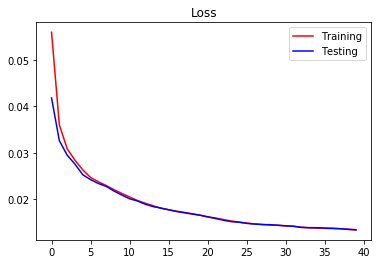

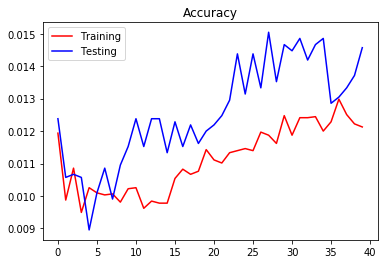

In [40]:
plt.figure(0)
plt.title("Loss")
plt.plot(hist.history['loss'], 'r', label='Training')
plt.plot(hist.history['val_loss'], 'b', label='Testing')
plt.legend()
plt.show()

plt.figure(1)
plt.title("Accuracy")
plt.plot(hist.history['acc'], 'r', label='Training')
plt.plot(hist.history['val_acc'], 'b', label='Testing')
plt.legend()
plt.show()

In [44]:
test = X_test[:20]
preds = auto_encode.predict(test)
test.shape, preds.shape

((20, 784), (20, 784))

In [45]:
auto_encode.weights

[<tf.Variable 'dense_7/kernel:0' shape=(784, 64) dtype=float32_ref>,
 <tf.Variable 'dense_7/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'dense_8/kernel:0' shape=(64, 784) dtype=float32_ref>,
 <tf.Variable 'dense_8/bias:0' shape=(784,) dtype=float32_ref>]

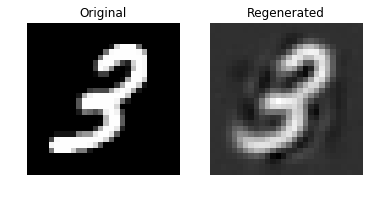

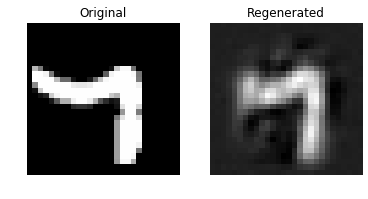

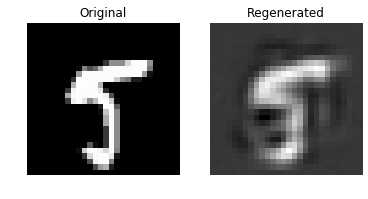

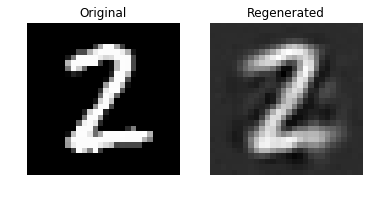

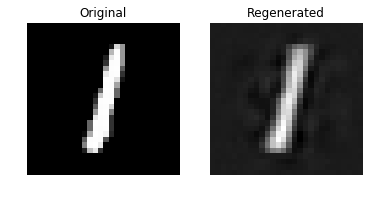

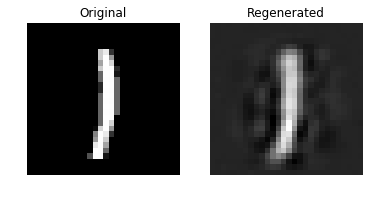

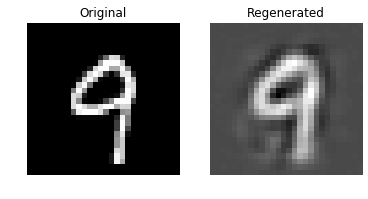

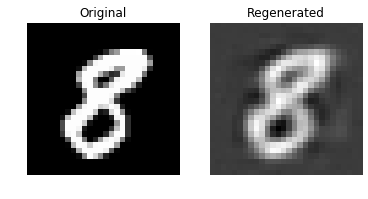

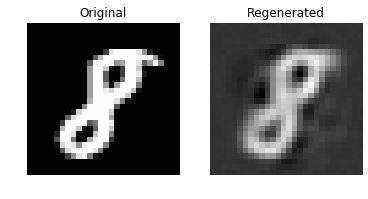

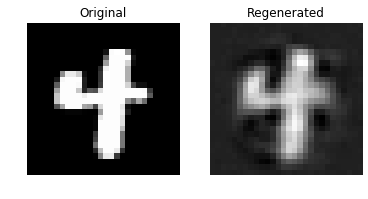

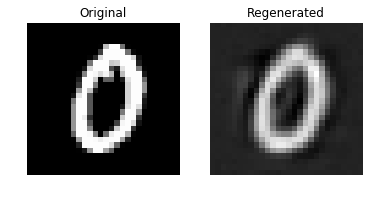

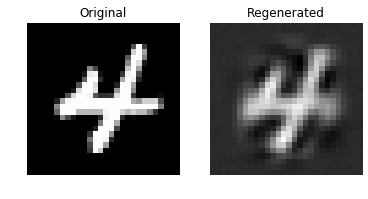

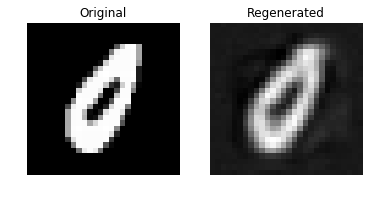

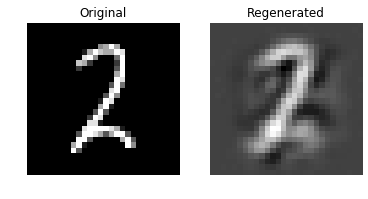

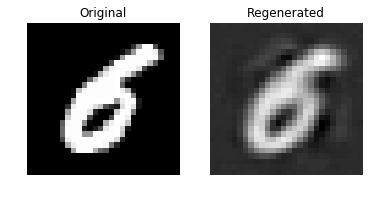

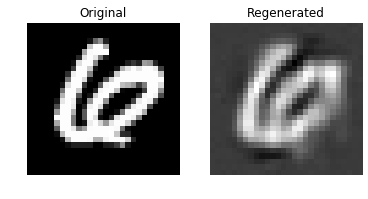

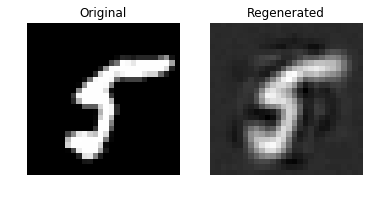

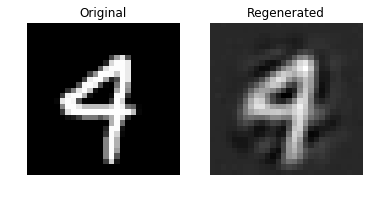

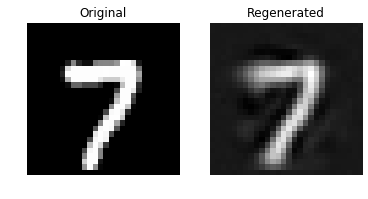

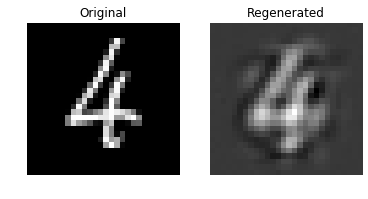

In [46]:
for i in range(test.shape[0]):
    plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original')
    plt.axis('off')
    plt.imshow(test[i].reshape((28,28)), cmap='gray')
    
    plt.subplot(1,2,2)
    plt.title('Regenerated')
    plt.axis('off')
    plt.imshow(preds[i].reshape((28,28)), cmap='gray')

## Encoding

In [47]:
auto_encode.layers

In [48]:
encoding = Model(inputs = inp , outputs = em)
encoding.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                50240     
Total params: 50,240
Trainable params: 50,240
Non-trainable params: 0
_________________________________________________________________


In [52]:
ec = encoding.predict(test)
ec.shape

(20, 64)

## Decoding

In [49]:
decode_inp = Input((64,))
decode_layes = Dense(784 , activation='relu')(decode_inp)

decoding = Model(inputs = decode_inp , outputs =  decode_layes)
decoding.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 784)               50960     
Total params: 50,960
Trainable params: 50,960
Non-trainable params: 0
_________________________________________________________________


In [54]:
dc = decoding.predict(ec)
dc.shape

(20, 784)